<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/Ensemble_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
from sklearn.datasets import make_hastie_10_2

x, y = make_hastie_10_2(n_samples=6000, random_state=42)

In [ ]:
(y >= 0.).mean()

0.5031666666666667

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test  = train_test_split(
    x, y, 
    test_size=0.25, 
    random_state=42,
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4500, 10), (4500,), (1500, 10), (1500,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    n_jobs=-1,
)

clf.fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_pred)

In [ ]:
df_thr = pd.DataFrame(
    {
        'True positive Rate': tpr,
        'False positive Rate': fpr,
        'threshold': threshold,
    }
)
df_thr[df_thr.threshold<1].set_index('threshold')

,True positive Rate,False positive Rate
threshold,,
0.98,0.001326,0.000000
0.95,0.007958,0.000000
0.94,0.015915,0.002681
0.93,0.022546,0.002681
0.92,0.038462,0.004021
...,...,...
0.04,1.000000,0.777480
0.03,1.000000,0.806971
0.02,1.000000,0.853887


In [ ]:
from sklearn.metrics import auc
auc_values = auc(fpr, tpr)

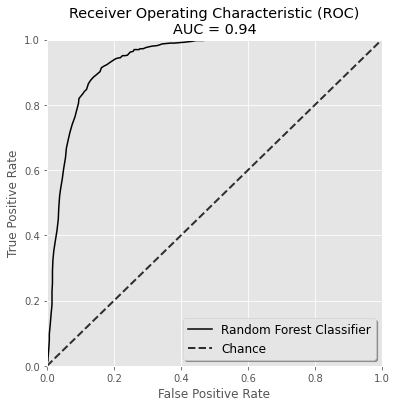

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharey=False)

pd.DataFrame(
    {
        'FPR': fpr,
        'TPR': tpr
    }
).set_index('FPR')['TPR'].plot(
    title=f'Receiver Operating Characteristic (ROC)\nAUC = {auc_values:.2f}',
    label='Random Forest Classifier',
    kind='line',
    xlim=(0,1),
    ylim=(0,1),
    color='k',
    ax=ax
)

ax.plot(
    [0, 1], [0, 1], 
    linestyle='--', 
    lw=2, color='k',
    label='Chance', alpha=.8
)


ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax.legend(ncol=1, fontsize='large', shadow=True)

fig.show()